# Image Classification using CovNets 

In [1]:
#Importing modules

import numpy as np
import os 
import keras
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


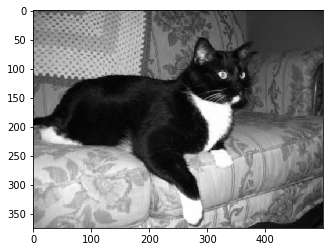

In [2]:
# Exploring the dataset
DIR = 'PetImages/'

CATEGORIES = ['Cats', 'Dogs']

for i in CATEGORIES:
    path = (os.path.join(DIR, i))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break
    

In [3]:
img_array

array([[ 74,  73,  72, ...,  36,  36,  36],
       [ 69,  74,  82, ...,  38,  38,  38],
       [ 76,  86, 100, ...,  39,  39,  39],
       ...,
       [159, 159, 159, ...,  35,  33,  32],
       [153, 155, 156, ...,  35,  35,  36],
       [148, 151, 153, ...,  37,  39,  41]], dtype=uint8)

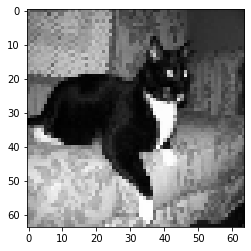

In [4]:
# resizing

IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()



In [5]:
# creating the dataset

dataset = []

def create_dataset():
    for i in CATEGORIES:
        path = (os.path.join(DIR, i))
        CLASS_NUM = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                dataset.append([new_array, CLASS_NUM])
            except Exception as e:
                pass


create_dataset()

In [6]:
len(dataset)

609

In [7]:
dataset[0]

[array([[117,  86,  89, ...,  46,  44,  40],
        [ 97, 129, 139, ...,  50,  47,  46],
        [137, 121, 143, ...,  52,  49,  48],
        ...,
        [127, 140, 181, ...,  10,  16,  10],
        [131, 162, 175, ...,  13,   8,   9],
        [158, 157, 165, ...,  14,   6,  36]], dtype=uint8), 0]

# Creating features and labels

In [8]:
X = []
y = []

for feature,label in dataset:
    X.append(feature)
    y.append(label)

In [9]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# y = np.array(y).reshape(1,-1)

In [10]:
X[0]

array([[[117],
        [ 86],
        [ 89],
        ...,
        [ 46],
        [ 44],
        [ 40]],

       [[ 97],
        [129],
        [139],
        ...,
        [ 50],
        [ 47],
        [ 46]],

       [[137],
        [121],
        [143],
        ...,
        [ 52],
        [ 49],
        [ 48]],

       ...,

       [[127],
        [140],
        [181],
        ...,
        [ 10],
        [ 16],
        [ 10]],

       [[131],
        [162],
        [175],
        ...,
        [ 13],
        [  8],
        [  9]],

       [[158],
        [157],
        [165],
        ...,
        [ 14],
        [  6],
        [ 36]]], dtype=uint8)

In [18]:
#importing layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

In [19]:
X = X/255.0

In [20]:
X.shape[1:]

(64, 64, 1)

## Training the Model

In [24]:
model=Sequential()

In [25]:
model.add(Conv2D(64,3,3, input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,3,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y,batch_size=32, validation_split=0.3, epochs=10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 1...)`
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """


Train on 426 samples, validate on 183 samples
Epoch 1/10
426/426 [==============================] - 3s 7ms/step - loss: 0.6359 - acc: 0.7113 - val_loss: 0.9950 - val_acc: 0.0000e+00
Epoch 2/10
426/426 [==============================] - 3s 6ms/step - loss: 0.6067 - acc: 0.7136 - val_loss: 1.2128 - val_acc: 0.0000e+00
Epoch 3/10
426/426 [==============================] - 3s 6ms/step - loss: 0.6054 - acc: 0.7136 - val_loss: 1.0754 - val_acc: 0.0000e+00
Epoch 4/10
426/426 [==============================] - 3s 6ms/step - loss: 0.6029 - acc: 0.7136 - val_loss: 1.2628 - val_acc: 0.0000e+00
Epoch 5/10
426/426 [==============================] - 3s 6ms/step - loss: 0.6015 - acc: 0.7136 - val_loss: 1.3363 - val_acc: 0.0000e+00
Epoch 6/10
426/426 [==============================] - 3s 6ms/step - loss: 0.6012 - acc: 0.7136 - val_loss: 1.2884 - val_acc: 0.0000e+00
Epoch 7/10
426/426 [==============================] - 3s 6ms/step - loss: 0.6033 - acc: 0.7136 - val_loss: 1.1421 - val_acc: 0.0000e+00
Ep

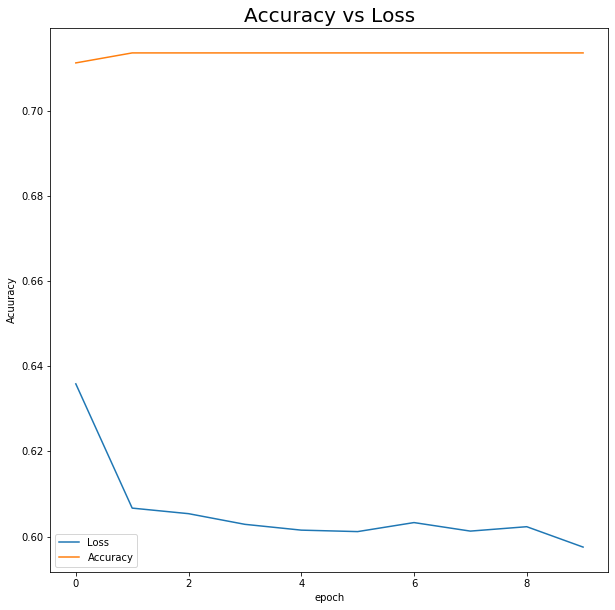

In [44]:
plt.figure(figsize=(10,10))
plt.title('Accuracy vs Loss', fontsize=20 )
plt.plot(model.history.history['loss'],label='Loss')
plt.plot(model.history.history['acc'], label='Accuracy')
plt.xlabel('epoch')
plt.ylabel('Acuuracy')
plt.legend()
plt.show()